### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

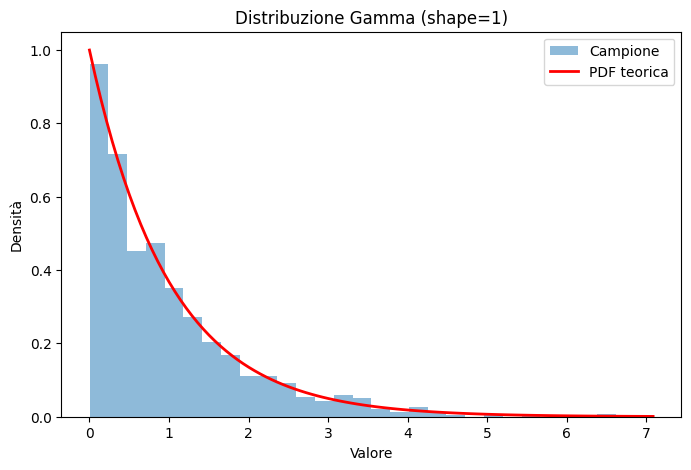

Parametri stimati (shape, loc, scale): (np.float64(0.9676278530566442), np.float64(0.0014370869991989408), np.float64(1.0322447394319938))


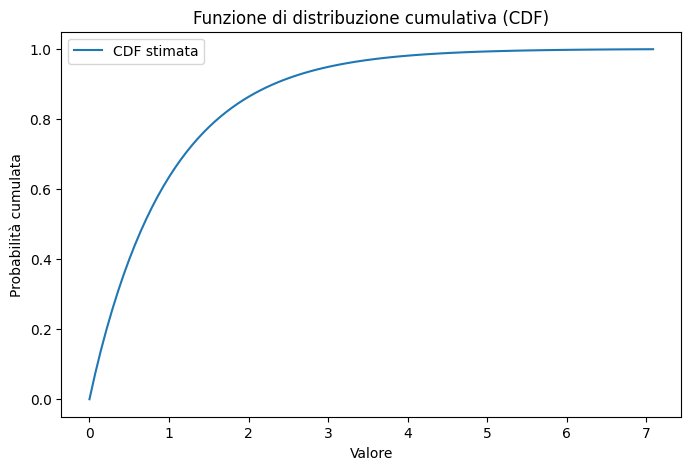

Varianza del campione: 1.0331054123042054


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

#1000 valori casuali da una distribuzione gamma
shape=1
sample=gamma.rvs(shape, size=1000)

#istogramma e pdf 
x = np.linspace(0, np.max(sample), 100)
plt.figure(figsize=(8,5))
plt.hist(sample, bins=30, density=True, alpha=0.5, label='Campione')
plt.plot(x, gamma.pdf(x, shape), 'r-', lw=2, label='PDF teorica')
plt.title('Distribuzione Gamma (shape=1)')
plt.xlabel('Valore')
plt.ylabel('Densità')
plt.legend()
plt.show()

#stima parametro campione 
parametri = gamma.fit(sample)
print("Parametri stimati (shape, loc, scale):", parametri)

#funzione di distripufzione 
plt.figure(figsize=(8,5))
plt.plot(x, gamma.cdf(x, *parametri), label='CDF stimata')
plt.title('Funzione di distribuzione cumulativa (CDF)')
plt.xlabel('Valore')
plt.ylabel('Probabilità cumulata')
plt.legend()
plt.show()

#varianza 
print("Varianza del campione:", np.var(sample))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

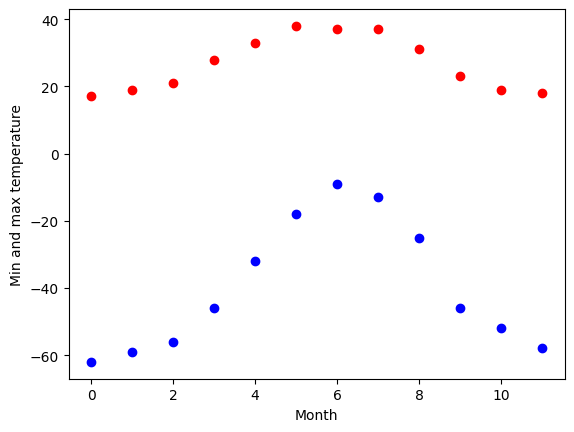

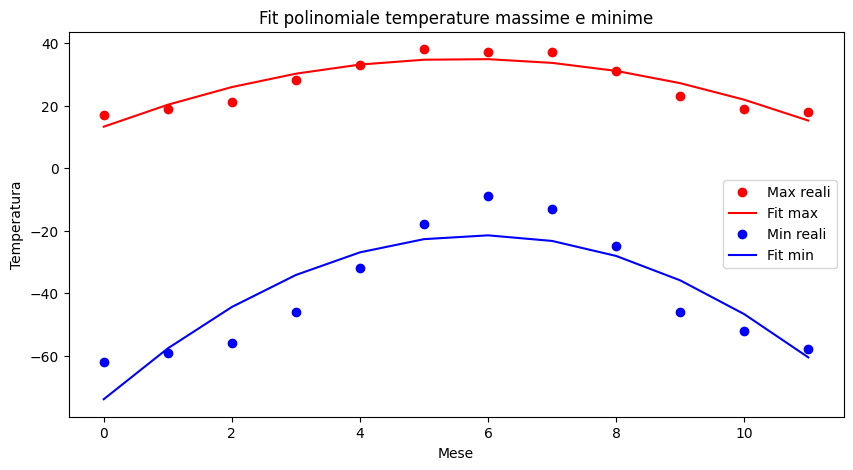

MAE max: 2.58, RMSE max: 8.76
MAE min: 7.52, RMSE min: 72.83


In [4]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

from sklearn.metrics import mean_absolute_error, mean_squared_error

#fit 
coeffs_max=np.polyfit(months, temp_max, 2)
coeffs_min=np.polyfit(months, temp_min, 2)

fit_max = np.polyval(coeffs_max, months)
fit_min = np.polyval(coeffs_min, months)

#plot 
plt.figure(figsize=(10,5))
plt.plot(months, temp_max, "ro", label="Max reali")
plt.plot(months, fit_max, "r-", label="Fit max")
plt.plot(months, temp_min, "bo", label="Min reali")
plt.plot(months, fit_min, "b-", label="Fit min")
plt.xlabel("Mese")
plt.ylabel("Temperatura")
plt.title("Fit polinomiale temperature massime e minime")
plt.legend()
plt.show()

#mae e rmse
mae_max = mean_absolute_error(temp_max, fit_max)
rmse_max = mean_squared_error(temp_max, fit_max)
mae_min = mean_absolute_error(temp_min, fit_min)
rmse_min = mean_squared_error(temp_min, fit_min)

print(f"MAE max: {mae_max:.2f}, RMSE max: {rmse_max:.2f}")
print(f"MAE min: {mae_min:.2f}, RMSE min: {rmse_min:.2f}")




### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

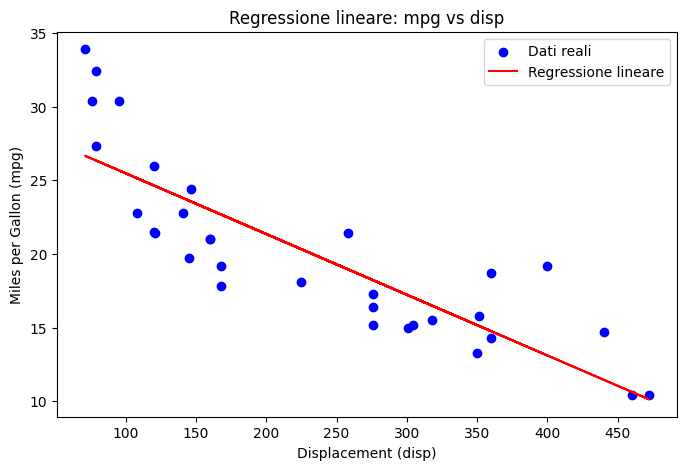

intercetta: 29.60
coefficiente o pendeza: -0.0412
R^2: 0.718


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

#variabili indipendenti e dipendenti
X=df[['disp']].values
y=df['mpg'].values

#modello regressione lineare
model = LinearRegression()
model.fit(X, y)

#predizioni
y_pred = model.predict(X)

#plot
plt.figure(figsize=(8,5))
plt.scatter(df['disp'], df['mpg'], color='blue', label='Dati reali')
plt.plot(df['disp'], y_pred, color='red', label='Regressione lineare')
plt.xlabel('Displacement (disp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Regressione lineare: mpg vs disp')
plt.legend()
plt.show()

#coefficienti
print(f"intercetta: {model.intercept_:.2f}")
print(f"coefficiente o pendeza: {model.coef_[0]:.4f}")

#R^2
print(f"R^2: {model.score(X, y):.3f}")

